In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import plotly.graph_objects as go
import plotly.express as px

import ipywidgets as widgets
from IPython.display import display, clear_output
from scipy import stats


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def extract_speed(flag):
    if isinstance(flag, str):
        if 'ST' in flag:
            return 'Super Turbo'
        if 'T' in flag:
            return 'Turbo'
    return 'Normal Speed'



def prepare_data(data):
    data['name'] = data['@name'].apply(lambda x: ','.join(x.split(',')[:-1]).strip() if isinstance(x, str) else '')
    data['start_time'] = pd.to_datetime(data['timestamp'] - data['@duration'], unit='s')
    data['weekDay'] = data['start_time'].dt.day_name()
    data['day_time'] = data['start_time'].dt.strftime('%H:%M')
    data['name+time'] = data['name'] + " at "+ data['day_time']
    data['speed'] = data['@flags'].apply(extract_speed)
    data['bounty'] = data['@flags'].apply(lambda x:'bounty' if isinstance(x, str) and 'B' in x else 'no knok')
    data['buy_in'] = data['@stake'] + data['@rake']

def load_whole_data():
    rooms = ['PokerStars', 'GGNetwork', 'Winamax.fr', 'PokerStars(FR-ES-PT)']
    root = '/content/drive/MyDrive/poker_data/'
    dfs = [pd.read_csv(f"{root}{room}.csv") for room in rooms]
    all_data = pd.concat(dfs)
    prepare_data(all_data)
    return all_data



In [ ]:
all_data = load_whole_data()
all_data.columns

Index(['@duration', '@date', '@prizePool', '@reEntries', '@tickets',
       '@currency', '@filterString', '@flags', '@game', '@gameClass', '@id',
       '@guarantee', '@name', '@network', '@overlay', '@playersPerTable',
       '@rake', '@stake', '@state', '@structure', '@totalEntrants',
       'CombinedAvROI', 'AvAbility', 'TypeCombinedAvROI', 'TypeAvAbility',
       'TypeAvDuration', 'TypeAvEntrants', 'TypeAvITM', '@dealMade',
       'timestamp', 'weekDay', '@totalRebuys', '@rebuyStake', 'name',
       'start_time', 'day_time', 'name+time', 'speed', 'bounty', 'buy_in'],
      dtype='object')

In [ ]:
all_data.groupby('@network')['AvAbility'].mean()

@network
GGNetwork               74.105704
PokerStars              70.552948
PokerStars(FR-ES-PT)    65.198670
Winamax.fr              63.620240
Name: AvAbility, dtype: float64

In [ ]:
all_data['buy_in'] = all_data['@stake'] + all_data['@rake']


In [ ]:
from IPython.display import display
import ipywidgets as widgets

# List of file names
files = ['PokerStars', 'GGNetwork', 'Winamax.fr', 'PokerStars(FR-ES-PT)']
prices = [11, 22, 33, 44, 55, 109]
prices_alter = [f'{i} - {i + 10}'for i in range(0, 101, 10)] + ['110 - 10000']
# Create a dropdown widget to select the file
dropdown_network = widgets.Dropdown(options=[''] + files, description='Select File:')
dropdown_price = widgets.Dropdown(options=[''] + prices, description='Select Price:')
min_buy_in_dropdown = widgets.Dropdown(options=[str(i) for i in range(200)], description='Min buy-in')
max_buy_in_dropdown = widgets.Dropdown(options=[str(i) for i in range(200)], description='Max buy-in')
min_buy_in = 0
max_buy_in = 3000
data = ''

def on_file_select(change):
    file_selected = change['new']
    # Display the selected file
    global data
    data = all_data[all_data['@network'] == file_selected]


def on_price_select(change):
    price_selected = change['new']
    # Display the selected file
    global data
    data = all_data[all_data['buy_in'] == price_selected]


def on_min_price_select(change):
    global min_buy_in, max_buy_in
    min_buy_in = int(change['new'])
    global data
    data = all_data[(all_data['buy_in'] >= min_buy_in) & (all_data['buy_in'] <= max_buy_in)]


def on_max_price_select(change):
    global min_buy_in, max_buy_in
    max_buy_in = int(change['new'])
    global data
    data = all_data[(all_data['buy_in'] >= min_buy_in) & (all_data['buy_in'] <= max_buy_in)]


# Attach the file selection function to the dropdown's on_change event
dropdown_network.observe(on_file_select, names='value')
dropdown_price.observe(on_price_select, names='value')
min_buy_in_dropdown.observe(on_min_price_select, names='value')
max_buy_in_dropdown.observe(on_max_price_select, names='value')


# Create an HBox layout container to display the dropdowns horizontally
dropdowns_row = widgets.HBox([min_buy_in_dropdown, max_buy_in_dropdown])


# Display the dropdown widget
display(dropdown_network)
display(dropdown_price)
display(dropdowns_row)

Dropdown(description='Select File:', options=('', 'PokerStars', 'GGNetwork', 'Winamax.fr', 'PokerStars(FR-ES-P…

Dropdown(description='Select Price:', options=('', 11, 22, 33, 44, 55, 109), value='')

In [ ]:
data

,@duration,@date,@prizePool,@reEntries,@tickets,@currency,@filterString,@flags,@game,@gameClass,...,weekDay,@totalRebuys,@rebuyStake,name,start_time,day_time,name+time,speed,bounty,buy_in
2,7254.0,2023-05-05 17:30:54,5799.99,6.0,0,USD,"Class:SCHEDULED;Type:H,NL,T,B;Type!:R;StakePlu...","B,T,ME",H,scheduled,...,Friday,NaN,NaN,"The Fast 5 $109 [5-Max, 5 Minute Levels, Progr...",2023-05-05 15:30:00,15:30,"The Fast 5 $109 [5-Max, 5 Minute Levels, Progr...",Turbo,bounty,109.0
3,4172.0,2023-05-05 15:54:32,3114.30,6.0,0,USD,"Class:SCHEDULED;Type:H,NL,ST,B;Type!:R;StakePl...","ST,B,ME",H,scheduled,...,Friday,NaN,NaN,Bounty Adrenaline $109 (Short: 20BB),2023-05-05 14:45:00,14:45,Bounty Adrenaline $109 (Short: 20BB) at 14:45,Super Turbo,bounty,109.0
6,8208.0,2023-05-05 15:31:48,8000.00,12.0,0,USD,"Class:SCHEDULED;Type:H,NL,T,B;Type!:R;StakePlu...","B,T,ME",H,scheduled,...,Friday,NaN,NaN,Hot $109 [Progressive KO],2023-05-05 13:15:00,13:15,Hot $109 [Progressive KO] at 13:15,Turbo,bounty,109.0
10,17716.0,2023-05-05 13:25:16,7799.96,14.0,0,USD,"Class:SCHEDULED;Type:H,NL,N,B;Type!:R;StakePlu...","B,ME",H,scheduled,...,Friday,NaN,NaN,Bounty Builder $109,2023-05-05 08:30:00,08:30,Bounty Builder $109 at 08:30,Normal Speed,bounty,109.0
12,9525.0,2023-05-05 12:40:45,5800.00,13.0,0,USD,"Class:SCHEDULED;Type:H,NL,T;Type!:R;StakePlusR...","T,ME",H,scheduled,...,Friday,NaN,NaN,"$109 Fast Friday [8-Max, Turbo, Early Edition]",2023-05-05 10:02:00,10:02,"$109 Fast Friday [8-Max, Turbo, Early Edition]...",Turbo,no knok,109.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1717,23445.0,2023-05-21 22:30:45,30000.00,43.0,0,EUR,"Class:SCHEDULED;Type:H,NL,N,B,6MX;Type!:R;Stak...","6MX,B,ME",H,scheduled,...,Sunday,NaN,NaN,"Sunday Bounty €100 [6-Max], €30",2023-05-21 16:00:00,16:00,"Sunday Bounty €100 [6-Max], €30 at 16:00",Normal Speed,bounty,100.0
1809,21020.0,2023-05-22 23:50:20,20000.00,38.0,0,EUR,"Class:SCHEDULED;Type:H,NL,N,B,6MX;Type!:R;Stak...","6MX,B,ME",H,scheduled,...,Monday,NaN,NaN,Super Monday Night on Stars Progressive KO €10...,2023-05-22 18:00:00,18:00,Super Monday Night on Stars Progressive KO €10...,Normal Speed,bounty,100.0
1828,98619.0,2023-05-22 22:23:39,50000.00,82.0,0,EUR,"Class:SCHEDULED;Type:H,NL,N;Type!:R;StakePlusR...",ME,H,scheduled,...,Sunday,NaN,NaN,"Sunday Special €100, €50",2023-05-21 19:00:00,19:00,"Sunday Special €100, €50 at 19:00",Normal Speed,no knok,100.0
1931,23166.0,2023-05-24 00:26:06,15000.00,26.0,0,EUR,"Class:SCHEDULED;Type:H,NL,N,B,6MX;Type!:R;Stak...","6MX,B,ME",H,scheduled,...,Tuesday,NaN,NaN,"Night on Stars Progressive KO €100 [6-Max], €15",2023-05-23 18:00:00,18:00,"Night on Stars Progressive KO €100 [6-Max], €1...",Normal Speed,bounty,100.0


In [ ]:
data['@playersPerTable'].value_counts()

8    345
6    224
9     22
7      2
0      1
Name: @playersPerTable, dtype: int64

<Axes: xlabel='speed,bounty,@playersPerTable'>

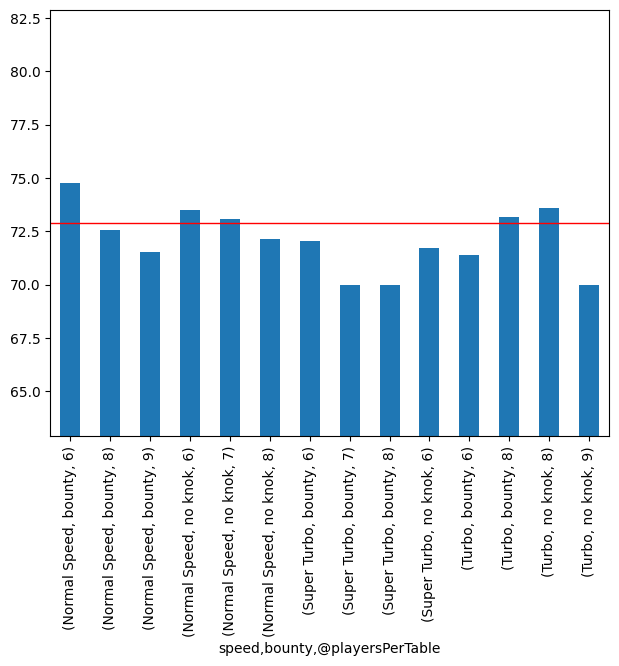

In [ ]:
data4grouping = data[data['@playersPerTable'] >= 6]
grouping_by_networks = data4grouping.groupby(['speed', 'bounty', '@playersPerTable'])['AvAbility'].mean()
avg = data['AvAbility'].mean()
plt.ylim(avg - 10, avg + 10)
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.axhline(y=avg, color='r', linestyle='-', linewidth=1, label='Среднее значение')
grouping_by_networks.plot.bar()

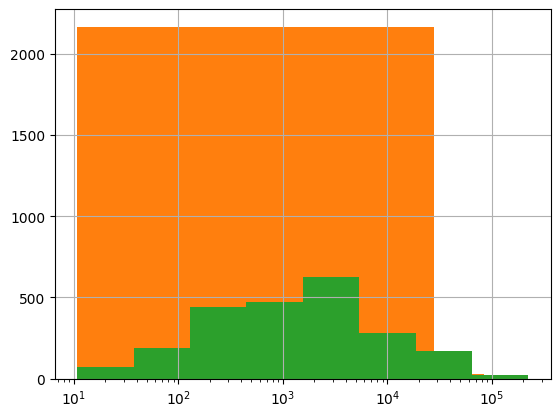

In [ ]:

data[data['@prizePool'] < 100]['@prizePool'].hist(bins=8)
hist, bins, _ = plt.hist(data['@prizePool'], bins=8)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(data['@prizePool'], bins=logbins)
plt.xscale('log')
plt.show()

In [ ]:
data['@prizePool'].value_counts() #[data['@prizePool'] < 10]

10000.00    28
15000.00    16
5000.00     15
20000.00    15
50.00       14
            ..
267.30       1
3464.10      1
1629.92      1
2254.03      1
718.84       1
Name: @prizePool, Length: 1680, dtype: int64

In [ ]:
data[data['@prizePool'] < 10000]['@prizePool'].count()

5722

<Axes: ylabel='Frequency'>

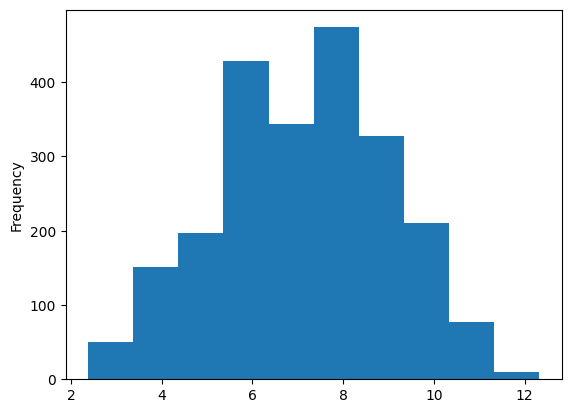

In [ ]:
np.log(data['@prizePool']).plot.hist(bins=10)

In [ ]:
data.columns

Index(['@duration', '@date', '@prizePool', '@reEntries', '@tickets',
       '@currency', '@filterString', '@flags', '@game', '@gameClass', '@id',
       '@guarantee', '@name', '@network', '@overlay', '@playersPerTable',
       '@rake', '@stake', '@state', '@structure', '@totalEntrants',
       'CombinedAvROI', 'AvAbility', 'TypeCombinedAvROI', 'TypeAvAbility',
       'TypeAvDuration', 'TypeAvEntrants', 'TypeAvITM', '@dealMade',
       'timestamp', 'weekDay'],
      dtype='object')

In [ ]:
data['@network'].value_counts()

GGNetwork    8496
Name: @network, dtype: int64

In [ ]:
data['@name'].value_counts()

Daily Hyper $50                                          320
Speed Racer Bounty $54 [10 BB]                           269
Flip & Go $3 [Go Stage]                                  268
Flip & Go $20 [Go Stage]                                 262
Daily Turbo $50                                          236
                                                        ... 
103-H: $250 Monday Megasonic [Hyper]                       1
98-H: $150 Monday Challenge Asia [6-Max]                   1
98-M: $25 Monday Challenge Asia [6-Max]                    1
$15 Mega to $150 World Festival Events, 2 Tickets GTD      1
121-M: $88 Black Rabbit Bounty                             1
Name: @name, Length: 572, dtype: int64

In [ ]:
data['@game'].value_counts()

H    8496
Name: @game, dtype: int64

In [ ]:
tmp = list(data['@flags'].dropna())
flags = set()
for line in tmp:
    print(line)
    for f in line.split(','):
        flags.add(f.strip())
flags


D,ME
B,ME
T,ME
ST,6MX,ME
ME
ST,6MX,ME
ME
ME
B,D,T,ME
D,ME
B,ME
6MX,B,ME
B,ME
B,ME
B,ME
ST,6MX,ME
T,ME
ST,6MX,ME
D,ME
ME
T,ME
6MX,B,ME
B,ME
B,ME
ST,6MX,ME
T,ME
B,ME
D,ME
ME
D,ME
ST,6MX,ME
6MX,B,ME
ME
ST,6MX,ME
B,ME
ME
ST,6MX,ME
6MX,B,ME
B,ME
B,ME
ST,6MX,ME
T,ME
ME
D,ME
ST,6MX,ME
B,D,T,ME
ST,6MX,ME
ME
6MX,B,ME
ST,6MX,ME
B,ME
B,D,T,ME
B,T,ME
ST,6MX,ME
6MX,B,ME
B,D,ME
T,ME
B,D,ME
ST,6MX,ME
B,ME
B,D,ME
ST,ME
ST,6MX,ME
B,ME
6MX,B,D,T,ME
ST,6MX,ME
D,T,ME
B,D,T,ME
B,ME
ST,6MX,B,ME
B,D,ME
ST,6MX,ME
ST,6MX,B,ME
B,D,T,ME
ST,6MX,ME
B,D,ME
ME
ST,6MX,ME
6MX,B,ME
D,ME
T,ME
ST,6MX,ME
T,ME
B,D,T,ME
ME
B,ME
6MX,B,ME
ST,6MX,ME
ME
T,ME
6MX,B,ME
T,ME
B,ME
B,D,ME
ST,6MX,ME
T,ME
D,ME
ST,6MX,ME
T,ME
ME
B,ME
D,ME
6MX,B,ME
ME
ST,6MX,ME
T,ME
B,D,T,ME
D,ME
ME
ST,6MX,ME
T,ME
B,ME
ST,6MX,ME
B,ME
B,D,T,ME
D,ME
B,ME
ME
B,ME
6MX,B,ME
B,ME
T,ME
ST,6MX,ME
B,ME
D,ME
ST,6MX,ME
6MX,B,ME
B,ME
ME
ST,6MX,ME
T,ME
D,ME
D,ME
ME
ST,6MX,ME
6MX,B,ME
B,ME
ME
ST,6MX,ME
B,ME
T,ME
B,ME
ST,6MX,ME
6MX,B,ME
ST,6MX,ME
B,ME
ME
ST,6MX,ME
D,M

{'6MX', 'B', 'D', 'FO', 'ME', 'ST', 'T'}

In [ ]:
data['@filterString'].value_counts()

Class:SCHEDULED;Type:H,NL,N;Type!:R;StakePlusRake:USD3              393
Class:SCHEDULED;Type:H,NL,ST,6MX;Type!:R;StakePlusRake:USD50        333
Class:SCHEDULED;Type:H,NL,N;Type!:R;StakePlusRake:USD20             318
Class:SCHEDULED;Type:H,NL,ST,6MX;Type!:R;StakePlusRake:USD100       271
Class:SCHEDULED;Type:H,NL,T;Type!:R;StakePlusRake:USD50             269
                                                                   ... 
Class:SCHEDULED;Type:H,NL,ST,B,6MX;Type!:R;StakePlusRake:USD8.88      1
Class:SCHEDULED;Type:H,NL,N;Type!:R;StakePlusRake:USD1050             1
Class:SCHEDULED;Type:H,NL,ST,6MX;Type!:R;StakePlusRake:USD25          1
Class:SCHEDULED;Type:H,NL,D;Type!:R;StakePlusRake:USD7.77             1
Class:SCHEDULED;Type:H,NL,ST,B;Type!:R;StakePlusRake:USD525           1
Name: @filterString, Length: 205, dtype: int64

In [ ]:
data['is_sat'] = data['@flags'].apply(lambda x: 1 if isinstance(x, str) and 'SAT' in x else 0)
data['is_sat']

0       0
1       0
2       0
3       0
4       0
       ..
8491    0
8492    0
8493    0
8494    0
8495    0
Name: is_sat, Length: 8496, dtype: int64

In [ ]:
data['Class'] = data['@filterString'].str.extract(r'Class:(.*?);')
data['Class'].value_counts()

SCHEDULED    8496
Name: Class, dtype: int64

In [ ]:
data['Type'] = data['@filterString'].str.extract(r'Type:(.*?);')
data['Type'].value_counts()
lines = list(data['Type'])
all_types = set()
for line in lines:
    for typ in line.split(','):
        all_types.add(typ.strip())

print(all_types)

{'B', 'D', 'N', 'T', '6MX', 'NL', 'ST', 'H'}


<ipython-input-12-62704ccb7a47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Type'] = data['@filterString'].str.extract(r'Type:(.*?);')


In [ ]:
data['Type!'] = data['@filterString'].str.extract(r'Type!:(.*?);')
data['Type!'].value_counts()

<ipython-input-13-0614077fe8af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Type!'] = data['@filterString'].str.extract(r'Type!:(.*?);')


R    3339
Name: Type!, dtype: int64

In [ ]:
data['@currency'].value_counts()
data[data['@currency'] == 'EUR']['@name']

3                                                   XTASE
10                                                  XTASE
18                                                  XTASE
25                                                  XTASE
32                                                  XTASE
                              ...                        
1717              Sunday Bounty €100 [6-Max], €30,000 Gtd
1809    Super Monday Night on Stars Progressive KO €10...
1828                     Sunday Special €100, €50,000 Gtd
1931    Night on Stars Progressive KO €100 [6-Max], €1...
2055    Night on Stars Progressive KO €100 [6-Max], €1...
Name: @name, Length: 113, dtype: object

In [ ]:
data['@playersPerTable'].value_counts()

8    2439
6     780
7      58
5      50
4       5
9       5
0       2
Name: @playersPerTable, dtype: int64

In [ ]:
data['@guarantee'].value_counts()

5000.0       406
10000.0      301
15000.0      228
2000.0       209
1500.0       205
            ... 
65000.0        1
88000.0        1
450000.0       1
135000.0       1
3000000.0      1
Name: @guarantee, Length: 62, dtype: int64

<Axes: >

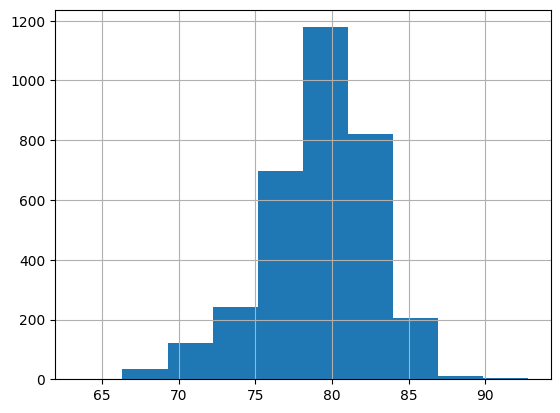

In [ ]:
data['AvAbility'].hist()

In [ ]:
data['@stake'].corr(data['AvAbility'])

0.08992064074084075

In [ ]:
corr_ability = data.corrwith(data['AvAbility'])
corr_ability[corr_ability.abs()>0.2]

<ipython-input-19-ec93eb2677f0>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_ability = data.corrwith(data['AvAbility'])


@id              0.202888
AvAbility        1.000000
TypeAvAbility    0.844243
dtype: float64

In [ ]:
corr_roi = data.corrwith(data['CombinedAvROI'])
corr_roi[corr_roi.abs()>0.2]


<ipython-input-20-1473dc0a2b84>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_roi = data.corrwith(data['CombinedAvROI'])


CombinedAvROI        1.000000
TypeCombinedAvROI    0.434068
dtype: float64

<Axes: >

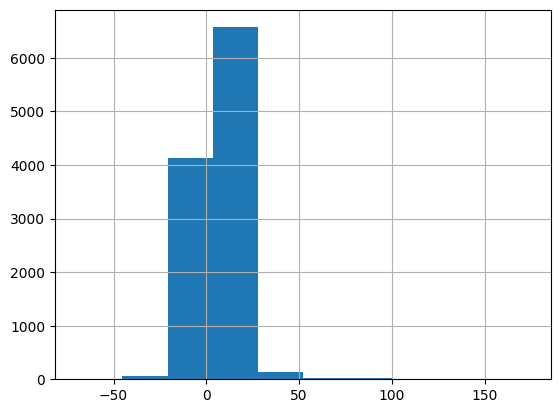

In [ ]:
data[data['CombinedAvROI']< 200]['CombinedAvROI'].hist()

In [ ]:
data['@overlay'].value_counts()

55.00      4
66.00      2
1.00       2
22.00      2
2.00       2
2.08       2
9.70       1
46.05      1
279.00     1
11.44      1
5.50       1
30.46      1
117.16     1
316.75     1
4.00       1
32.50      1
101.06     1
700.00     1
59.30      1
3.30       1
402.99     1
0.36       1
340.00     1
301.60     1
64.50      1
64.78      1
650.00     1
29.45      1
7.40       1
110.00     1
291.30     1
99.00      1
0.82       1
41.24      1
315.60     1
4.50       1
5.14       1
52.50      1
137.00     1
99.47      1
0.44       1
231.74     1
4000.00    1
10.00      1
5.40       1
750.00     1
6.00       1
5.00       1
2.47       1
161.28     1
2.85       1
2.40       1
88.00      1
2.20       1
2108.20    1
137.50     1
Name: @overlay, dtype: int64

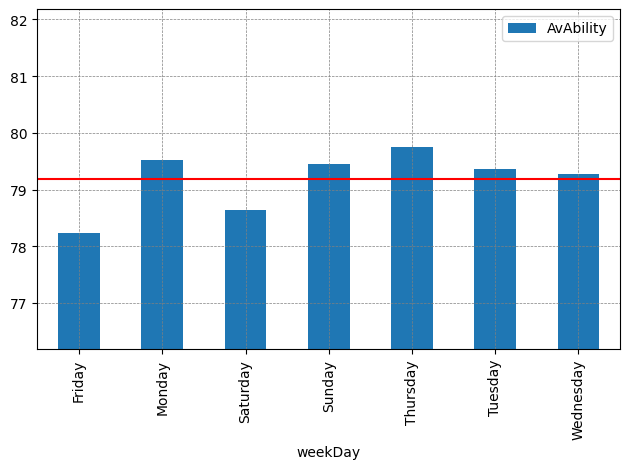

In [ ]:
grouping_by_weekDay = data[['AvAbility', 'weekDay']].groupby('weekDay').mean()

ax = grouping_by_weekDay.plot.bar()
avg = data['AvAbility'].mean()
plt.ylim(avg - 3, avg + 3)
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')

plt.axhline(y=avg, color='r', linestyle='-', label=f'Mean: {avg:.2f}')
plt.show()

In [ ]:
data['@date'] = pd.to_datetime(data['@date'])
data['@date'].dt.hour.value_counts()
data['hour'] = data['@date'].dt.hour

<ipython-input-22-b1897f026dc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['@date'] = pd.to_datetime(data['@date'])
<ipython-input-22-b1897f026dc4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour'] = data['@date'].dt.hour


<Axes: xlabel='hour'>

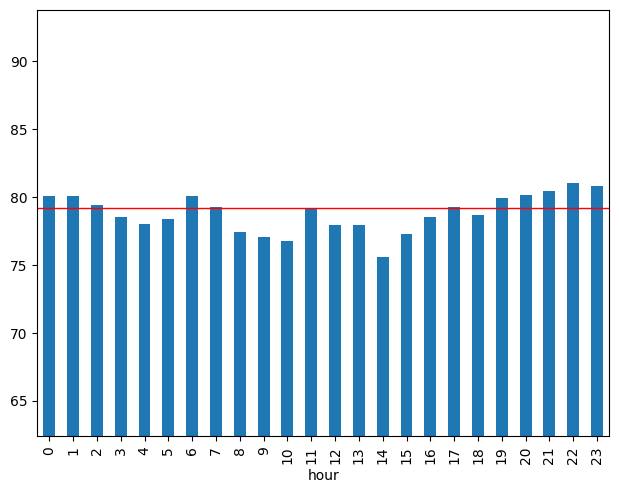

In [ ]:
grouping_by_hours = data.groupby('hour')['AvAbility'].mean()
avg = data['AvAbility'].mean()
plt.ylim(data['AvAbility'].min() - 1, data['AvAbility'].max() + 1)
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.axhline(y=avg, color='r', linestyle='-', linewidth=1, label='Среднее значение')
grouping_by_hours.plot.bar()

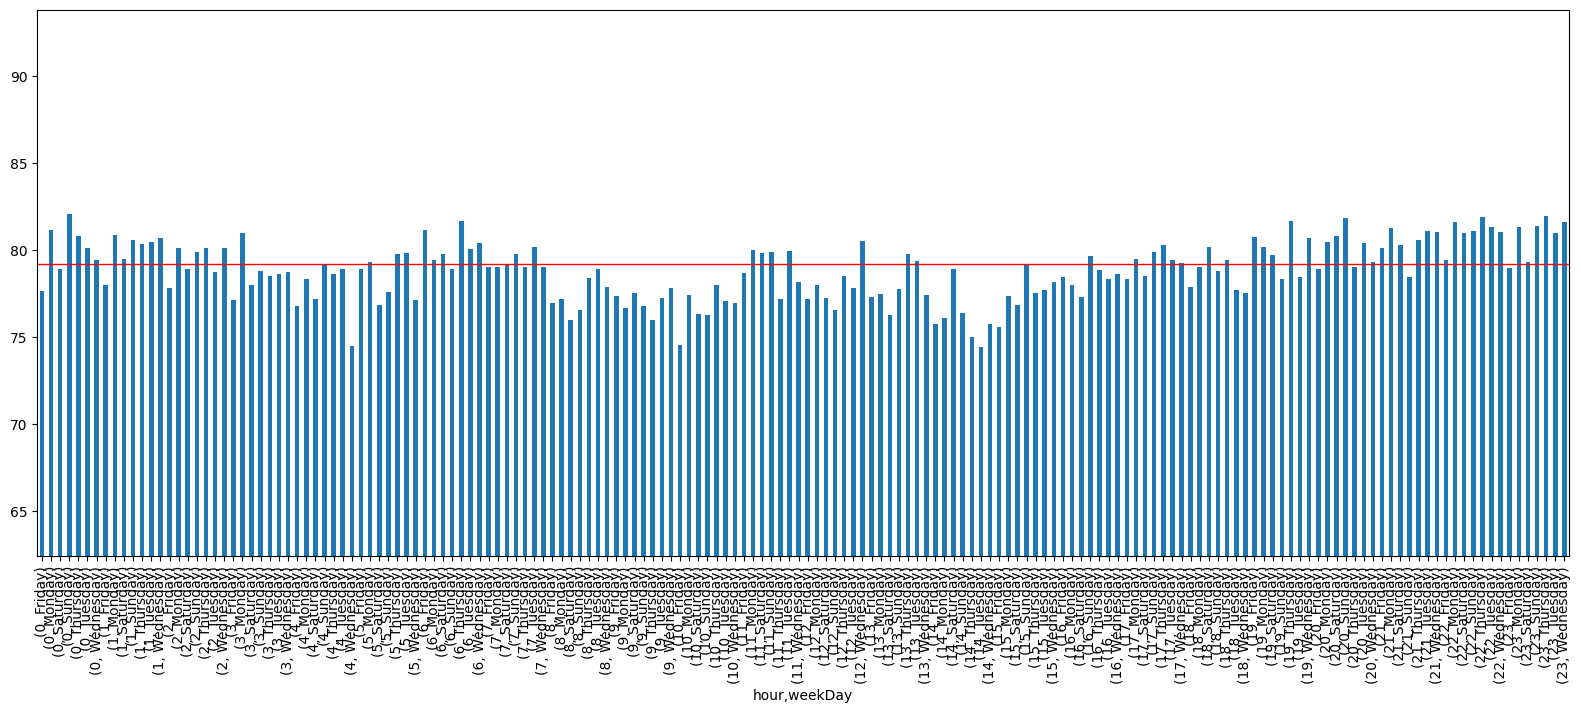

In [ ]:
grouping_by_week_time = data.groupby(['hour', 'weekDay'])['AvAbility'].mean()
avg = data['AvAbility'].mean()
fig = plt.figure(figsize=(16, 6))
plt.ylim(data['AvAbility'].min() - 1, data['AvAbility'].max() + 1)
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.axhline(y=avg, color='r', linestyle='-', linewidth=1, label='Среднее значение')
grouping_by_week_time.plot.bar()
plt.show()

<Axes: xlabel='@network'>

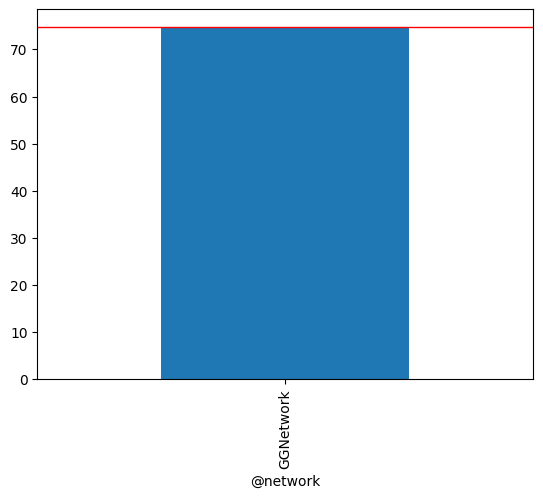

In [ ]:
grouping_by_networks = data.groupby('@network')['AvAbility'].mean()
avg = data['AvAbility'].mean()
plt.axhline(y=avg, color='r', linestyle='-', linewidth=1, label='Среднее значение')
grouping_by_networks.plot.bar()

<Axes: xlabel='@network'>

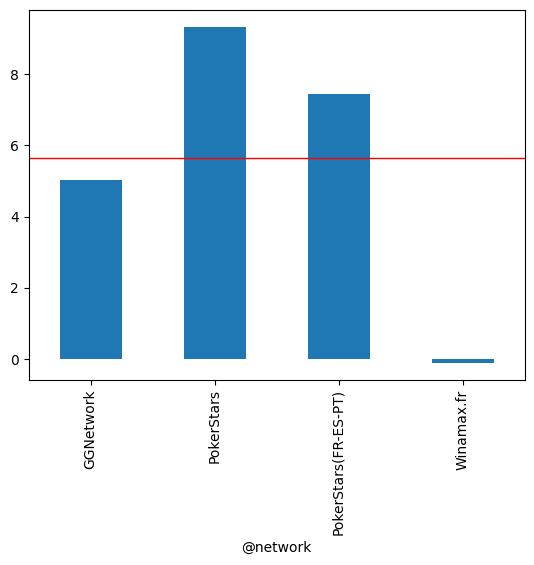

In [ ]:
grouping_by_networks = data.groupby('@network')['CombinedAvROI'].mean()
avg = data['CombinedAvROI'].mean()
plt.axhline(y=avg, color='r', linestyle='-', linewidth=1, label='Среднее значение')
grouping_by_networks.plot.bar()

In [ ]:
grouping_by_networks

@network
GGNetwork               5.024641
PokerStars              9.329044
PokerStars(FR-ES-PT)    7.438060
Winamax.fr             -0.105622
Name: CombinedAvROI, dtype: float64

In [ ]:
data['@structure'].value_counts()

NL    8496
Name: @structure, dtype: int64

In [ ]:
data['@totalEntrants'].value_counts()

17      99
10      97
9       92
12      92
19      87
        ..
4106     1
1740     1
1946     1
1195     1
1640     1
Name: @totalEntrants, Length: 1429, dtype: int64

In [ ]:
data[data['@totalEntrants'] > 30].count()

Unnamed: 0           680
@duration            680
@date                680
@prizePool           680
@reEntries           641
@tickets             680
@currency            680
@filterString        680
@flags               672
@game                680
@gameClass           680
@id                  680
@guarantee           666
@name                680
@network             680
@playersPerTable     680
@rake                680
@stake               680
@state               680
@structure           680
@totalEntrants       680
CombinedAvROI        680
AvAbility            680
TypeCombinedAvROI    657
TypeAvAbility        657
TypeAvDuration       657
TypeAvEntrants       657
TypeAvITM            657
@overlay              89
@targetGameID         51
@dealMade             24
@totalRebuys           0
@rebuyStake            0
weekDay              680
Class                680
Type                 680
Type!                680
hour                 680
dtype: int64

In [ ]:
def get_mean_conf_interval(series):
    mean_value = series.mean()
    # standart error
    sem = series.sem()
    confidence_level = 0.99
    t_score = stats.t.ppf((1 + confidence_level) / 2, len(series) - 1)
    # Calculate the margin of error
    margin_of_error = t_score * sem
    print(stats.t.interval(alpha=confidence_level, df=len(series)-1, loc=mean_value, scale=sem))
    return mean_value - margin_of_error, mean_value + margin_of_error

In [ ]:
data[data['@totalEntrants'] < 1000]['AvAbility'].mean()
get_mean_conf_interval(data[data['@totalEntrants'] > 10]['AvAbility'])

(74.57869296101326, 74.95686647083322)


/tmp/ipykernel_5672/3496508956.py:9: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  print(stats.t.interval(alpha=confidence_level, df=len(series)-1, loc=mean_value, scale=sem))


(74.57869296101326, 74.95686647083322)

In [ ]:
data[data['@totalEntrants'] >= 1000]['AvAbility'].mean()
get_mean_conf_interval(data[data['@totalEntrants'] <= 10]['AvAbility'])

(73.21164460101176, 75.03613317676601)


/tmp/ipykernel_5672/3496508956.py:9: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  print(stats.t.interval(alpha=confidence_level, df=len(series)-1, loc=mean_value, scale=sem))


(73.21164460101176, 75.03613317676601)

In [ ]:
# 40 - 230 USD
# rooms: ggnetworks, winamax.fr,pockerstars-eu, pockerstars
# - rm sattelites, HU
# targets: days, timeslots,
# - Hyper for every network
# - speedracer for GG
# +